### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn import metrics
from tqdm.notebook import tqdm
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\soham\OneDrive\Desktop\LP III Practical tcoer\ML\lab 2 spam email\emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.shape

(5172, 3002)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


### Without upsampling

In [7]:
df = df.drop("Email No.", axis=1)

In [8]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

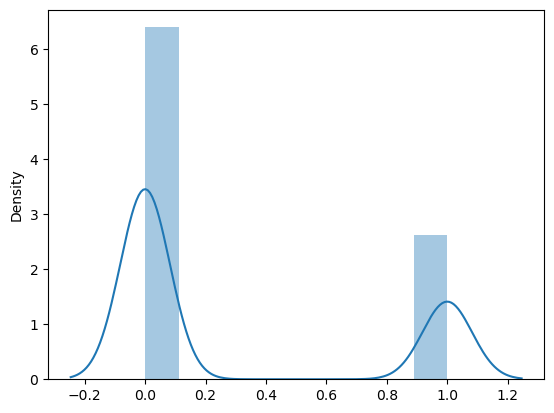

In [9]:
sns.distplot(x=df["Prediction"])
plt.show()

In [10]:
x = df.drop("Prediction", axis=1)
y = df[["Prediction"]]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### KNN with elbow plot

In [12]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_values = []

In [13]:
for i in tqdm(range(len(k_values))):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

  0%|          | 0/15 [00:00<?, ?it/s]

In [14]:
accuracy_values

[0.8589371980676328,
 0.8772946859903382,
 0.8685990338164251,
 0.8695652173913043,
 0.8772946859903382,
 0.8705314009661835,
 0.8734299516908213,
 0.8782608695652174,
 0.8801932367149758,
 0.8801932367149758,
 0.8763285024154589,
 0.8705314009661835,
 0.8657004830917875,
 0.8676328502415459,
 0.8666666666666667]

In [15]:
px.line(x=k_values, y=accuracy_values)

In [16]:
optimal_k = -1
optimal_accuracy = -1
for i in list(zip(k_values, accuracy_values)):
    if i[1] > optimal_accuracy:
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [18]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [19]:
y_pred = knn_model.predict(x_test)

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       733
           1       0.79      0.80      0.80       302

    accuracy                           0.88      1035
   macro avg       0.85      0.86      0.86      1035
weighted avg       0.88      0.88      0.88      1035



### SVM

In [21]:
svm_model = SVC()

In [22]:
svm_model.fit(x_train, y_train)

SVC()

In [23]:
y_pred = svm_model.predict(x_test)

In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       733
           1       0.90      0.40      0.56       302

    accuracy                           0.81      1035
   macro avg       0.85      0.69      0.72      1035
weighted avg       0.83      0.81      0.79      1035



### With upsampling

In [26]:
spam_data = df[df["Prediction"] == 1] 
ham_data = df[df["Prediction"] == 0]

In [27]:
new_df = ham_data
new_df = pd.concat([ham_data, spam_data])

In [28]:
spam_upsample = resample(spam_data,
             replace=True,
             n_samples=int(0.8*len(ham_data)),
             random_state=42)

In [29]:
new_df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [30]:
new_df.shape

(5172, 3001)

In [31]:
new_df = new_df.sample(frac=1)

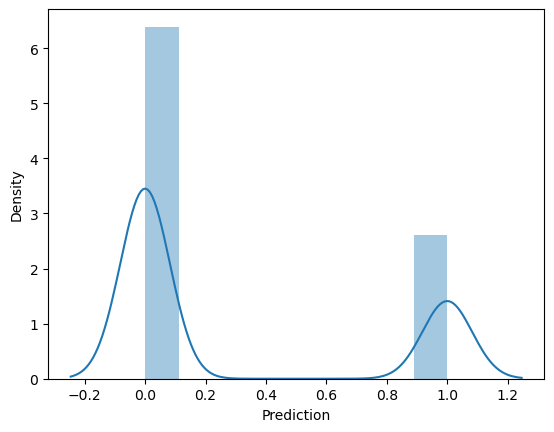

In [32]:
sns.distplot(new_df["Prediction"])
plt.show()

In [33]:
x = new_df.drop("Prediction", axis=1)
y = new_df[["Prediction"]]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### KNN with elbow plot

In [35]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_values = []

In [36]:
for i in tqdm(range(len(k_values))):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

  0%|          | 0/15 [00:00<?, ?it/s]

In [37]:
px.line(x=k_values, y=accuracy_values)

In [38]:
optimal_k = -1
optimal_accuracy = -1
for i in list(zip(k_values, accuracy_values)):
    if i[1] > optimal_accuracy:
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [40]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
y_pred = knn_model.predict(x_test)

In [42]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       734
           1       0.73      0.84      0.78       301

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035



# SVM

In [43]:
svm_model = SVC()

In [44]:
svm_model.fit(x_train, y_train)

SVC()

In [45]:
y_pred = svm_model.predict(x_test)

In [46]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       734
           1       0.84      0.41      0.55       301

    accuracy                           0.81      1035
   macro avg       0.82      0.69      0.71      1035
weighted avg       0.81      0.81      0.78      1035



# Functions

In [ ]:
def read_data(path: str) -> pd.DataFrame:
    """
    Read data from csv file.

    Args:
        path (str): path to csv file.

    Returns:
        pd.DataFrame: dataframe of csv file.
    """
    df = pd.read_csv(path)
    return df

def basic_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Get basic information of dataframe.
    
    Args:
        df (pd.DataFrame): dataframe.
        
    Returns:
        pd.DataFrame: dataframe of basic information.
    """
    return df.info()

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop("Email No.", axis=1)
    return df

def split_data(df: pd.DataFrame) -> tuple:
    """
    Split data into train and test set.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        tuple: tuple of train and test set.
    """
    x = df.drop("Prediction", axis=1)
    y = df[["Prediction"]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

def knn_model_with_elbow_method(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, k_values: list) -> np.ndarray:
    """
    KNN model with elbow method.

    Args:
        x_train (np.ndarray): x_train data.
        x_test (np.ndarray): x_test data.
        y_train (np.ndarray): y_train data.
        y_test (np.ndarray): y_test data.
        k_values (list): list of k values.

    Returns:
        np.ndarray: y_pred data.
    """
    accuracy_values = []
    for i in tqdm(range(len(k_values))):
        model = KNeighborsClassifier(n_neighbors=k_values[i])
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    fig = px.line(x=k_values, y=accuracy_values, title="K value vs Accuracy")
    fig.update_layout(xaxis_title="K values", yaxis_title="Accuracy values")
    fig.show()
    optimal_k = -1
    optimal_accuracy = -1
    for i in list(zip(k_values, accuracy_values)):
        if i[1] > optimal_accuracy:
            optimal_k = i[0]
            optimal_accuracy = i[1]
    knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    return y_pred

def svm_model(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray) -> np.ndarray:
    """
    SVM model.

    Args:
        x_train (np.ndarray): x_train data.
        x_test (np.ndarray): x_test data.
        y_train (np.ndarray): y_train data.
        y_test (np.ndarray): y_test data.

    Returns:
        np.ndarray: y_pred data.
    """
    svm_model = SVC()
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    return y_pred

def metrics_report(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """
    Print metrics report.

    Args:
        y_test (np.ndarray): y_test data.
        y_pred (np.ndarray): y_pred data.
    """
    print(metrics.classification_report(y_test, y_pred))

def upsample_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Upsample data.
    
    Args:
        df (pd.DataFrame): dataframe.
        
    Returns:
        pd.DataFrame: upsampled dataframe.
    """
    spam_data = df[df["Prediction"] == 1] 
    ham_data = df[df["Prediction"] == 0]
    spam_upsample = resample(
        spam_data,
        replace=True,
        n_samples=int(0.8*len(ham_data)),
        random_state=42
    )
    new_df = ham_data
    # new_df = new_df.append(spam_upsample)
    new_df = pd.concat([ham_data, spam_upsample])
    new_df = new_df.sample(frac=1)
    return new_df

In [48]:
df = read_data(r"C:\Users\soham\OneDrive\Desktop\LP III Practical tcoer\ML\lab 2 spam email\emails.csv")
basic_info(df)
df = preprocess(df)
df = upsample_data(df)
x_train, x_test, y_train, y_test = split_data(df)
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
y_pred_knn = knn_model_with_elbow_method(x_train, x_test, y_train, y_test, k_values)
y_pred_svm = svm_model(x_train, x_test, y_train, y_test)
print("Metrics for KNN-\n")
metrics_report(y_test, y_pred_knn)
print("Metrics for SVM-\n")
metrics_report(y_test, y_pred_svm)

NameError: name 'read_data' is not defined